In [2]:
!pip install mlp

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
import numpy as np

In [6]:

X,Y = make_circles(n_samples=500, noise=0.02)

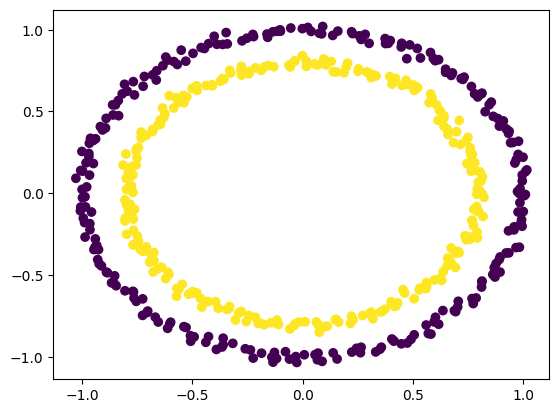

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [10]:
def phi(X):
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2

    X_ = np.zeros((X.shape[0], 3))
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_


In [13]:
X_ = phi(X)
print(X_.shape)

(500, 3)


In [39]:
def plot3d(X):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]

    ax.scatter(X1,X2,X3 , zdir='z', s=20, c=Y, depthshade=True)

    return ax

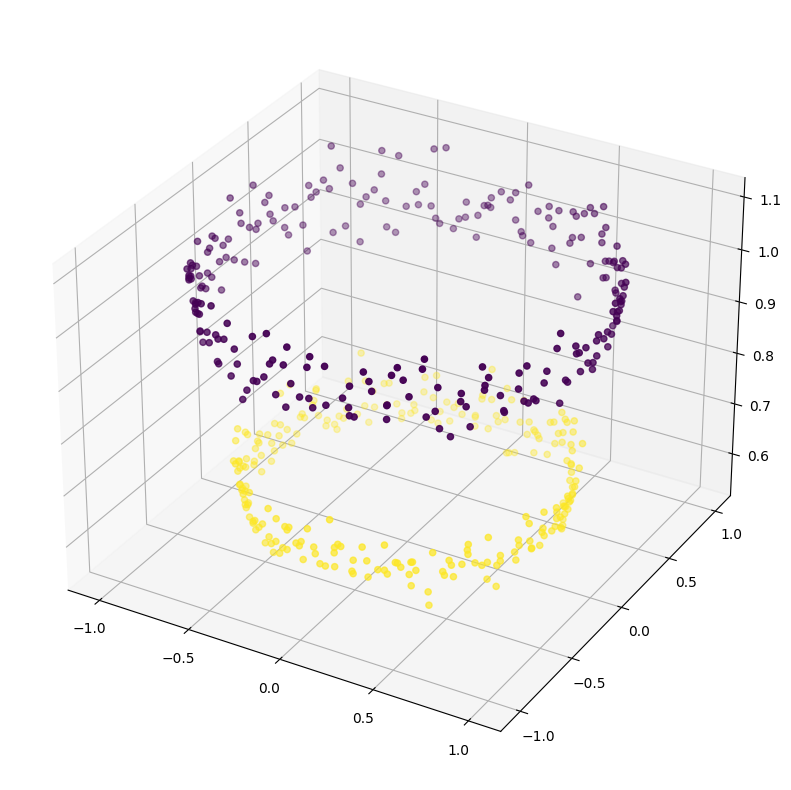

In [17]:
plot3d(X_)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [20]:
lr = LogisticRegression()


Cross validating the original dataset

In [24]:
score = cross_val_score(lr,X,Y,cv=5).mean()
print(score*100)

46.0


Cross validation on the Generated high dimention dataset

In [25]:
score = cross_val_score(lr, X_, Y, cv=5).mean()
print(score*100)

100.0


In [26]:
lr.fit(X_,Y)

LogisticRegression()

In [33]:
weights = lr.coef_



In [32]:
bias = lr.intercept_

Making a imaginary meshgrip to measure z as this is a 3d plot so the equation will be w1x1 + w2x2 + w3x3+ bias = 0

In [30]:
xx, yy = np.meshgrid(range(-2,2), range(-2,2))

In [34]:
z = -(weights[0,0]*xx + weights[0,1]*yy + bias)/weights[0,2]

In [35]:
z

array([[0.82497662, 0.8254034 , 0.82583017, 0.82625695],
       [0.82167813, 0.8221049 , 0.82253168, 0.82295845],
       [0.81837964, 0.81880641, 0.81923318, 0.81965996],
       [0.81508114, 0.81550792, 0.81593469, 0.81636147]])

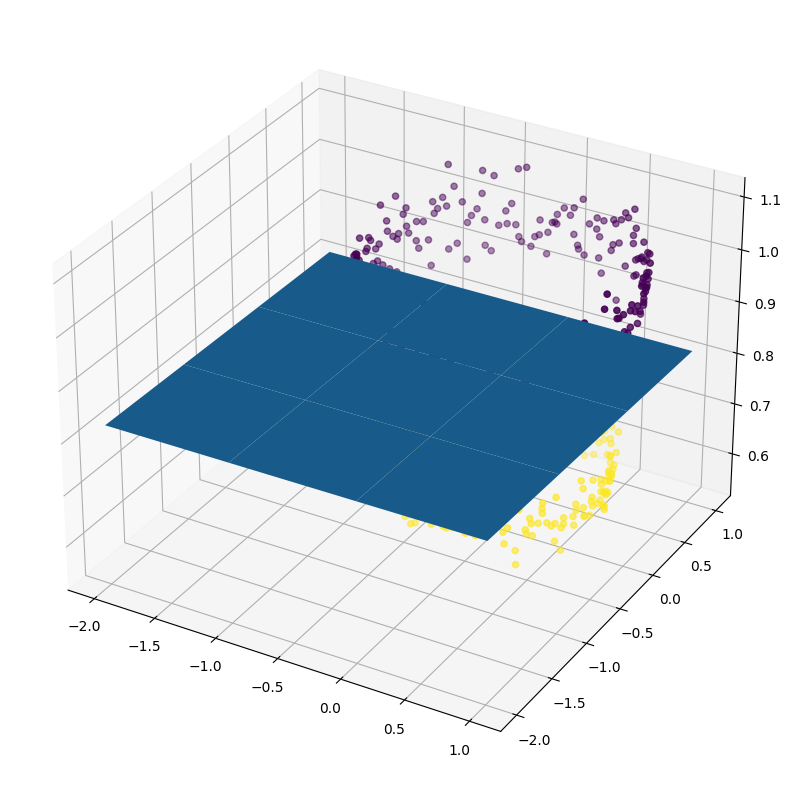

In [40]:
ax = plot3d(X_)
ax.plot_surface(xx,yy,z)
plt.show()

In [41]:
from sklearn import svm

Linear Kernel

In [45]:
svc = svm.SVC(kernel='linear')
svc.fit(X,Y)

SVC(kernel='linear')

In [46]:
svc.score(X,Y)

0.51

RBF Kernel

In [51]:
svc = svm.SVC(kernel='rbf')
svc.fit(X,Y)
print(svc.score(X,Y))

1.0


In [52]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

In [53]:
svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
print(svc.score(X,Y))

1.0
